In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    

어떤 사람이 병원 예약을 하고, 모든 안내 사항을 받았지만 나타나지 않았습니다. 누구의 잘못일까요? 
no_show가 타겟컬럼임

In [124]:
# =========================================
# 3. 데이터 로드 & “전처리 필요함” 체감하기
# =========================================
import pandas as pd
import numpy as np
from pathlib import Path
# 0) CSV 파일 경로 (프로젝트 폴더에 CSV를 넣어두세요)
csv_path = Path("./data/KaggleV2-May-2016.csv")
if not csv_path.exists():
    raise FileNotFoundError(
        f"CSV 파일이 없습니다: {csv_path}\n"
        "Kaggle에서 'Medical Appointment No Shows' 데이터를 다운로드한 뒤,\n"
        "현재 노트북(.ipynb)과 같은 폴더에 'KaggleV2-May-2016.csv'로 넣어주세요."
    )
# 1) CSV 로드
df = pd.read_csv(csv_path)
# 2) CSV 로드 후 바로 확인 (요구사항 그대로)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [125]:
df.shape

(110527, 14)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [127]:
df.isna().mean().sort_values(ascending=False)
# 뭐 결측값 안나옴

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

In [128]:
df.columns.to_list()

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [129]:
df2 = df.copy()

In [130]:
# 1) 컬럼명 정리: 소문자/공백 제거/하이픈 -> 언더바 -> 보기 좋게 변경
df2.columns = (
    df2.columns
    .str.strip()
    .str.lower()
    .str.replace("-", "_", regex=False)
    .str.replace(" ", "_", regex=False)
)

In [131]:
df2.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [132]:
df2.columns.to_list()

['patientid',
 'appointmentid',
 'gender',
 'scheduledday',
 'appointmentday',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'no_show']

In [133]:
# 2) 날짜(datetime) 변환 -> 날짜형으로 바꿈
df2["scheduledday"] = pd.to_datetime(df2["scheduledday"], errors="coerce", utc=True)
df2["appointmentday"] = pd.to_datetime(df2["appointmentday"], errors="coerce", utc=True)

In [134]:
df2[["scheduledday", "appointmentday"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   scheduledday    110527 non-null  datetime64[ns, UTC]
 1   appointmentday  110527 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.7 MB


In [135]:
df2["no_show"].head()

0    No
1    No
2    No
3    No
4    No
Name: no_show, dtype: object

In [136]:
df2["no_show"].head()

0    No
1    No
2    No
3    No
4    No
Name: no_show, dtype: object

In [137]:
df2["no_show"].value_counts()

no_show
No     88208
Yes    22319
Name: count, dtype: int64

In [138]:
# 3) 타겟 변환: no_show (Yes=1, No=0)
df2["no_show"] = df2["no_show"].map({"Yes": 1, "No": 0})
###################################################
# 이거 다시 실행하면 값 결측값으로 변함
# 그래서 위에 올라가서 다시 시작하는건 왠만해선 금지하기
# 말을 개씨발병신같이 해서 그렇지 중요한 내용임 ㅇㅇ
# 할꺼면 df2.copy()까지 올라가야함 ㅇㅇ
# 각 과정이 끝나면 카피하는 습관을 들여보기

In [139]:
df2["no_show"].value_counts()
#################
# 결과값
# 노쇼의 컬럼이 다음과 같다.

no_show
0    88208
1    22319
Name: count, dtype: int64

In [140]:
# 날짜 기준 wait_days (0일 포함) 2016-04-29 18:38:08+00:00 → 2016-04-29 18:38:08
scheduled_date = df2["scheduledday"].dt.tz_convert(None).dt.normalize()
appointment_date = df2["appointmentday"].dt.tz_convert(None).dt.normalize()
df2["wait_days"] = (appointment_date - scheduled_date).dt.days

In [141]:
df2.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [142]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [144]:
df2["wait_days"].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

In [145]:
(df2["wait_days"] < 0).sum()

np.int64(5)

In [146]:
neg_rows = df2[df2["wait_days"] < 0].copy()

In [147]:
neg_rows

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait_days
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-1


In [148]:
# 불리언 인섹싱
df2 = df2[df2["wait_days"] >= 0].copy()

In [149]:
df2["wait_days"].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

No-show rate: 20.19 %


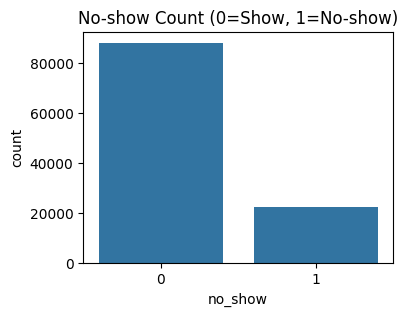

In [150]:
# 다음 단계 1) 시각화 #1 — 노쇼 비율(타겟 분포)
# 아래 셀 실행 후, 출력(노쇼율 %) + 그래프가 나온 화면 설명 한 줄만 보내주세요.
import matplotlib.pyplot as plt
import seaborn as sns
rate = df2["no_show"].mean()
print("No-show rate:", round(rate*100, 2), "%")
plt.figure(figsize=(4,3))
sns.countplot(data=df2, x="no_show")
plt.title("No-show Count (0=Show, 1=No-show)")
plt.xlabel("no_show")
plt.ylabel("count")
plt.show()

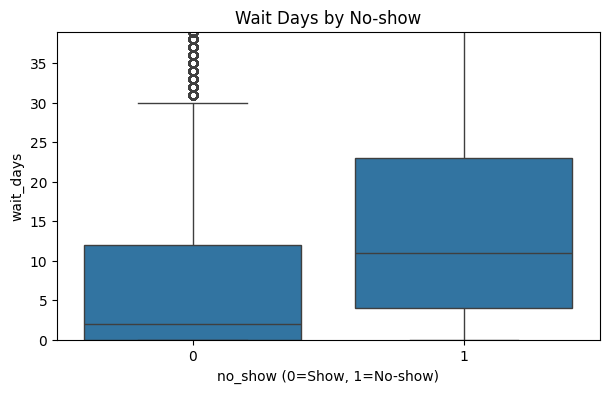

In [151]:
# 다음 단계 2) 시각화 #2 — wait_days(대기일) vs 노쇼 (박스플롯)
# 아래 셀 실행 후, 그래프 보고 한 줄 해석만 보내주세요.
plt.figure(figsize=(7,4))
sns.boxplot(data=df2, x="no_show", y="wait_days")
plt.ylim(0, df2["wait_days"].quantile(0.95))  # 상위 95%까지만
plt.title("Wait Days by No-show")
plt.xlabel("no_show (0=Show, 1=No-show)")
plt.ylabel("wait_days")
plt.show()

In [ ]:
# 박스플롯 아주그냥 개지랄이 나버렸구나

In [152]:
# 2) 파생변수: 요일/시간/나이구간
df2["appt_dow"] = df2["appointmentday"].dt.day_name()
df2["sched_hour"] = df2["scheduledday"].dt.hour
bins = [-1, 0, 12, 18, 30, 45, 60, 75, 110]
labels = ["0", "1-12", "13-18", "19-30", "31-45", "46-60", "61-75", "76+"]
df2["age_group"] = pd.cut(df2["age"], bins=bins, labels=labels)
print("\nwait_days min:", df2["wait_days"].min())
print("age min/max:", df2["age"].min(), df2["age"].max())
df2[["age","age_group","wait_days","appt_dow","sched_hour","no_show"]].head()


wait_days min: 0
age min/max: -1 115


,age,age_group,wait_days,appt_dow,sched_hour,no_show
0,62,61-75,0,Friday,18,0
1,56,46-60,0,Friday,16,0
2,62,61-75,0,Friday,16,0
3,8,1-12,0,Friday,17,0
4,56,46-60,0,Friday,16,0


appt_dow
Saturday     0.2308
Friday       0.2123
Monday       0.2064
Tuesday      0.2009
Wednesday    0.1969
Thursday     0.1935
Name: no_show, dtype: float64


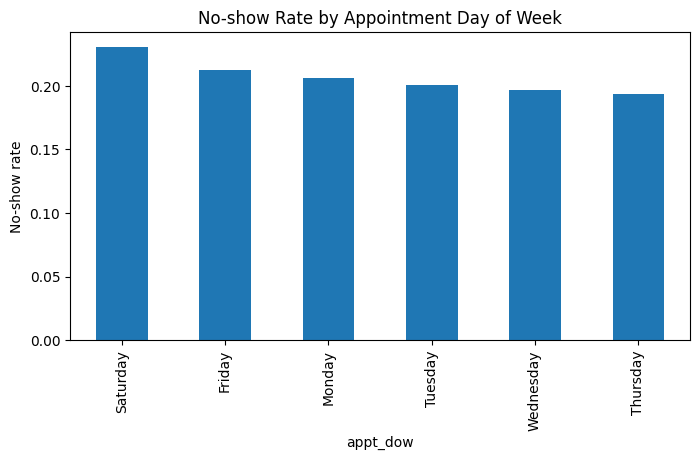

In [153]:
# 다음 단계 3) 시각화 #3 — 요일별 노쇼율 (표 + 막대그래프)
# 아래 셀 실행하고, 출력 표에서 상위 1개 요일 / 하위 1개 요일만 보내주세요.
df2["appt_dow"] = df2["appointmentday"].dt.day_name()
dow_rate = df2.groupby("appt_dow")["no_show"].mean().sort_values(ascending=False)
print(dow_rate.round(4))
plt.figure(figsize=(8,4))
dow_rate.plot(kind="bar")
plt.title("No-show Rate by Appointment Day of Week")
plt.ylabel("No-show rate")
plt.show()

In [ ]:
df2 = df2.rename(columns={"hipertension": "hypertension"})

In [159]:
# 다음 셀: EDA 요약표 자동 생성
# 나이 구간(없으면 생성)
# 오타 조심해라 등신새끼야
if "age_group" not in df2.columns:
    bins = [-1, 0, 12, 18, 30, 45, 60, 75, 110, 200]
    labels = ["0", "1-12", "13-18", "19-30", "31-45", "46-60", "61-75", "76+", "110+"]
    df2["age_group"] = pd.cut(df2["age"], bins=bins, labels=labels)
def rate_table(col, min_n=200):
    tmp = df2.groupby(col)["no_show"].agg(n="size", no_show_rate="mean").reset_index()
    tmp["no_show_rate(%)"] = (tmp["no_show_rate"] * 100).round(2)
    tmp = tmp.sort_values("no_show_rate(%)", ascending=False)
    return tmp[tmp["n"] >= min_n]
cols = ["gender", "sms_received", "scholarship", "hypertension", "diabetes", "alcoholism", "handcap", "age_group"]
for c in cols:
    print(f"\n=== {c} ===")
    display(rate_table(c, min_n=200))


=== gender ===


,gender,n,no_show_rate,no_show_rate(%)
0,F,71837,0.203113,20.31
1,M,38685,0.199638,19.96



=== sms_received ===


,sms_received,n,no_show_rate,no_show_rate(%)
1,1,35482,0.275745,27.57
0,0,75040,0.166978,16.70



=== scholarship ===


,scholarship,n,no_show_rate,no_show_rate(%)
1,1,10861,0.237363,23.74
0,0,99661,0.198031,19.80



=== hypertension ===


,hypertension,n,no_show_rate,no_show_rate(%)
0,0,88721,0.208992,20.9
1,1,21801,0.173020,17.3



=== diabetes ===


,diabetes,n,no_show_rate,no_show_rate(%)
0,0,102579,0.203589,20.36
1,1,7943,0.180033,18.00



=== alcoholism ===


,alcoholism,n,no_show_rate,no_show_rate(%)
0,0,107162,0.201909,20.19
1,1,3360,0.201488,20.15



=== handcap ===


,handcap,n,no_show_rate,no_show_rate(%)
0,0,108283,0.202331,20.23
1,1,2040,0.178431,17.84



=== age_group ===


C:\Users\joon5\AppData\Local\Temp\ipykernel_46200\887130321.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df2.groupby(col)["no_show"].agg(n="size", no_show_rate="mean").reset_index()


,age_group,n,no_show_rate,no_show_rate(%)
2,13-18,7830,0.260536,26.05
3,19-30,16763,0.247032,24.70
4,31-45,21953,0.213684,21.37
1,1-12,17496,0.209591,20.96
0,0,3539,0.180559,18.06
5,46-60,23179,0.178222,17.82
7,76+,5386,0.160787,16.08
6,61-75,14370,0.148643,14.86


In [160]:
df2.groupby("hypertension")["age"].agg(["count","mean","median"]).round(2)

,count,mean,median
hypertension,,,
0,88721,31.31,30.0
1,21801,60.61,61.0


In [161]:
#1-7) 타입 정리(0/1 컬럼을 “정수/범주형”으로)
flag_cols = ["scholarship","hypertension","diabetes","alcoholism","handcap","sms_received","no_show"]
for c in flag_cols:
    df2[c] = pd.to_numeric(df2[c], errors="coerce").astype("Int64")
#df2["gender"] = df2["Gender"] if "Gender" in df.columns else df2["gender"]
df2["gender"] = df2["gender"].astype("category")
df2[flag_cols].dtypes, df2["gender"].dtype

(scholarship     Int64
 hypertension    Int64
 diabetes        Int64
 alcoholism      Int64
 handcap         Int64
 sms_received    Int64
 no_show         Int64
 dtype: object,
 CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object))

In [162]:
# 1) 나이구간별(행) × 고혈압(열) 노쇼율 피벗
# age_group 없으면 생성
if "age_group" not in df2.columns:
    bins = [-1, 0, 12, 18, 30, 45, 60, 75, 110, 200]
    labels = ["0", "1-12", "13-18", "19-30", "31-45", "46-60", "61-75", "76+", "110+"]
    df2["age_group"] = pd.cut(df2["age"], bins=bins, labels=labels)
pivot = pd.pivot_table(
    df2,
    index="age_group",
    columns="hypertension",
    values="no_show",
    aggfunc="mean"
)
(pivot * 100).round(2)

C:\Users\joon5\AppData\Local\Temp\ipykernel_46200\2563256968.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


hypertension,0,1
age_group,,
0,18.06,<NA>
1-12,20.95,33.33
13-18,26.03,32.14
19-30,24.76,21.6
31-45,21.67,19.17
46-60,17.61,18.24
61-75,14.18,15.46
76+,14.16,17.26


In [163]:
cnt = pd.pivot_table(
    df2,
    index="age_group",
    columns="hypertension",
    values="no_show",
    aggfunc="size",
    fill_value=0
)
cnt

C:\Users\joon5\AppData\Local\Temp\ipykernel_46200\1910312528.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cnt = pd.pivot_table(


hypertension,0,1
age_group,,
0,3539,0
1-12,17484,12
13-18,7802,28
19-30,16439,324
31-45,19292,2661
46-60,15405,7774
61-75,6707,7663
76+,2048,3338


numeric columns: ['patientid', 'appointmentid', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show', 'wait_days']


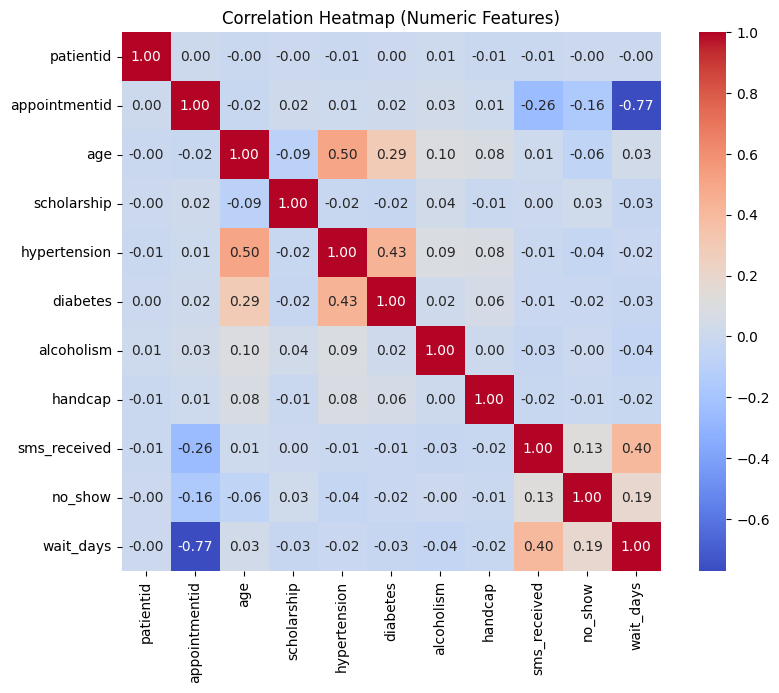

In [164]:
# A. 상관관계 히트맵 + “중복(높은 상관)” 컬럼 후보 제거
# A-1) 숫자형 컬럼만 뽑고 상관행렬 확인
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
num_df = df2.select_dtypes(include=["int64", "float64"]).copy()
# 타겟 포함한 숫자형 컬럼 목록 확인
print("numeric columns:", num_df.columns.tolist())
corr = num_df.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
# 매우 중요한 상관 히트맵이랍니다

In [165]:
# 다음 단계 C) df2_clean 만들기 (오류/이상치 정리 + ID 제거)
# 아래 셀 실행 후 출력 캡처 올려주세요.
df2_clean = df2.copy()
# 1) 명백한 오류 제거: age < 0 (여기서는 -1)
before = len(df2_clean)
df2_clean = df2_clean[df2_clean["age"] >= 0].copy()
after = len(df2_clean)
print("removed age<0:", before - after)
# 2) ID 컬럼 제거(모델용)
df2_clean = df2_clean.drop(columns=["patientid", "appointmentid"], errors="ignore")
# 3) wait_days 상위 1% 클리핑(안정적)
q99 = df2_clean["wait_days"].quantile(0.99)
df2_clean["wait_days"] = df2_clean["wait_days"].clip(upper=q99)
print("q99(wait_days):", q99)
print("df2_clean shape:", df2_clean.shape)
print(df2_clean[["age","wait_days"]].describe(percentiles=[0.95, 0.99]))

removed age<0: 1
q99(wait_days): 68.0
df2_clean shape: (110521, 16)
                 age      wait_days
count  110521.000000  110521.000000
mean       37.089386      10.011328
std        23.109885      14.290664
min         0.000000       0.000000
50%        37.000000       4.000000
95%        75.000000      39.000000
99%        86.000000      68.000000
max       115.000000      68.000000


# 기계학습 할때 위 작업이 매우 필수다.

In [166]:
# 기계학습
# 다음 단계 1) X, y 만들기 (df2_clean 기준)
# 아래 셀 실행 후 출력(X shape, y mean) + head() 캡처 올려주세요.
# 타겟
y = df2_clean["no_show"].astype(int)
# 피처(날짜/ID 제외, 숫자+범주형만)
feature_cols = [
    "age", "wait_days",
    "sms_received", "scholarship",
    "hypertension", "diabetes", "alcoholism", "handcap",
    "gender", "appt_dow", "neighbourhood"
]
X = df2_clean[[c for c in feature_cols if c in df2_clean.columns]].copy()
print("X shape:", X.shape)
print("y mean(no_show rate):", round(y.mean(), 4))
print("columns used:", X.columns.tolist())
X.head()

X shape: (110521, 11)
y mean(no_show rate): 0.2019
columns used: ['age', 'wait_days', 'sms_received', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap', 'gender', 'appt_dow', 'neighbourhood']


,age,wait_days,sms_received,scholarship,hypertension,diabetes,alcoholism,handcap,gender,appt_dow,neighbourhood
0,62,0,0,0,1,0,0,0,F,Friday,JARDIM DA PENHA
1,56,0,0,0,0,0,0,0,M,Friday,JARDIM DA PENHA
2,62,0,0,0,0,0,0,0,F,Friday,MATA DA PRAIA
3,8,0,0,0,0,0,0,0,F,Friday,PONTAL DE CAMBURI
4,56,0,0,0,1,1,0,0,F,Friday,JARDIM DA PENHA


In [168]:
# Step 2) Train/Test 분리
# 아래 셀 실행 후 출력 캡처 올려주세요.
# 다운 받아야 하잖아 씹년아
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("train:", X_train.shape, "test:", X_test.shape)
print("train no_show rate:", round(y_train.mean(), 4), "test no_show rate:", round(y_test.mean(), 4))

train: (88416, 11) test: (22105, 11)
train no_show rate: 0.2019 test no_show rate: 0.2019


In [169]:
# 다음 단계: Step 3 (인코딩 + 정규화 + 로지스틱 회귀 모델 학습/평가)
# 아래 셀을 그대로 실행하고, 출력(특히 confusion_matrix, classification_report)을 캡처해서 올려주세요.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# 숫자/범주 컬럼 분리
num_cols = X_train.select_dtypes(include=["int64","float64","int32","float32"]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]
print("num_cols:", num_cols)
print("cat_cols:", cat_cols)
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)
model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, pred))
print("\nclassification_report:\n", classification_report(y_test, pred, digits=4))

num_cols: ['age', 'wait_days', 'sms_received', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap']
cat_cols: ['gender', 'appt_dow', 'neighbourhood']
confusion_matrix:
 [[17496   146]
 [ 4363   100]]

classification_report:
               precision    recall  f1-score   support

           0     0.8004    0.9917    0.8859     17642
           1     0.4065    0.0224    0.0425      4463

    accuracy                         0.7960     22105
   macro avg     0.6035    0.5071    0.4642     22105
weighted avg     0.7209    0.7960    0.7156     22105



In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model_bal = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
model_bal.fit(X_train, y_train)
pred_bal = model_bal.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, pred_bal))
print("\nclassification_report:\n", classification_report(y_test, pred_bal, digits=4))

confusion_matrix:
 [[11937  5705]
 [ 1889  2574]]

classification_report:
               precision    recall  f1-score   support

           0     0.8634    0.6766    0.7587     17642
           1     0.3109    0.5767    0.4040      4463

    accuracy                         0.6565     22105
   macro avg     0.5871    0.6267    0.5813     22105
weighted avg     0.7518    0.6565    0.6871     22105



In [173]:
import pandas as pd
import numpy as np
# 1) 가상 환자 1명 (학습에 사용한 11개 피처만 맞춰서 입력)
new_patient = pd.DataFrame([{
    "age": 35,
    "wait_days": 12,
    "sms_received": 1,
    "scholarship": 0,
    "hypertension": 0,
    "diabetes": 0,
    "alcoholism": 0,
    "handcap": 0,
    "gender": "F",
    "appt_dow": "Saturday",
    "neighbourhood": "JARDIM CAMBURI"  # 학습 데이터에 있었던 값이면 가장 좋음
}])
# 2) 노쇼 확률 예측
proba = model_bal.predict_proba(new_patient)[:, 1][0]  # no_show=1 확률
# 3) threshold로 최종 예측(원하는 값으로 조절 가능)
threshold = 0.60
pred = int(proba >= threshold)
print("no_show probability:", round(proba, 4))
print("pred_no_show (0=Show, 1=No-show):", pred)

no_show probability: 0.5213
pred_no_show (0=Show, 1=No-show): 0


In [174]:
import joblib, json
import pandas as pd
from pandas.api.types import is_numeric_dtype
# 1) 파이프라인 저장 (전처리+모델 통째로)
joblib.dump(model_bal, "./data/no_show_pipeline.joblib")
# 2) Streamlit 입력폼을 쉽게 만들기 위한 메타 저장
feature_columns = X_train.columns.tolist()
schema = {}
defaults = {}
for col in feature_columns:
    s = X_train[col]
    if is_numeric_dtype(s):
        schema[col] = {"type": "num"}
        defaults[col] = float(s.median())  # 기본값: 중앙값
    else:
        schema[col] = {
            "type": "cat",
            # 옵션이 너무 많으면 UI가 무거워져서 최대 200개만 (원하면 늘리세요)
            "options": sorted(s.dropna().astype(str).unique().tolist())[:200]
        }
        mode = s.dropna().astype(str).mode()
        defaults[col] = mode.iloc[0] if len(mode) else ""
meta = {
    "feature_columns": feature_columns,
    "schema": schema,
    "defaults": defaults,
    "label_map": {0: "Show", 1: "No-show"}  # 본인 기준에 맞게 유지
}
with open("./data/no_show_meta.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)
print("Saved:", "/data/no_show_pipeline.joblib", "/data/no_show_meta.json")

Saved: /data/no_show_pipeline.joblib /data/no_show_meta.json


In [ ]:
준 데이터로 반복 학습 하시랜다 씨발 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ